# Classifying Disaster Tweets!

It is fire season again in LA and you are thr new social media account data scientist for the Governor of California. Your job is to determine what consituents are saying about disasters given a large corpus of tweets. The only problem, how do you know if someone is talking about a cooking disaster #nailedit, or a natural disaster? 

### Goal: Classify a tweet as a disaster or non-disaster tweet.

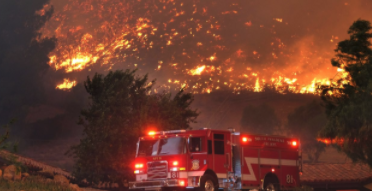

In [1]:
from IPython.display import Image
Image("images/fire.png")

## Setup

In [2]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
!pwd

/Users/nicholasbeaudoin/Desktop/GA/DATR_601/layup_lines/layuplines_lesson_16


## Load data

In [4]:
# Import the train dataset of tweets
df = pd.read_csv("data/train.csv")

In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Sample disaster tweet

In [6]:
# What does a sample of a disaster tweet look like?
df[df['target'] == 1].values[1][3]

'Forest fire near La Ronge Sask. Canada'

Sample non-disaster tweet

In [7]:
# What does a sample of a non-disaster tweet look like?
df[df['target'] == 0].values[1][3]

'I love fruits'

## Data split

In [8]:
# create feature/target variable
X = df['text']
y = df['target']

In [9]:
# Split the data into train_test_split
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Vectorization

Trying to create a model that can take an input text and determine if disaster or non-disaster tweet.

- Instantiate vectorizer
- Fit vocabulary
- Transform vocab to vector space (document term matrix - DTM)


In [10]:
# instantiate
vect = CountVectorizer()

# fit
vect.fit(X_train)

# transform to DTM
X_train_dtm = vect.transform(X_train)
X_train_dtm

<5100x16398 sparse matrix of type '<class 'numpy.int64'>'
	with 74814 stored elements in Compressed Sparse Row format>

In [11]:
# transform testing data (using fitted vocabulary) into a document-term matrix (DON'T USE .FIT ON TEST DATA!!!)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<2513x16398 sparse matrix of type '<class 'numpy.int64'>'
	with 31076 stored elements in Compressed Sparse Row format>

## Modelling

- split test/train
- import
- instantiate
- fit
- predict

In [12]:
# import
from sklearn.naive_bayes import MultinomialNB

# instantiate
nb = MultinomialNB()

# fit
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [14]:
# calculate accuracy of class predictions
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.8026263430163152


In [15]:
# confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1263  183]
 [ 313  754]]


In [16]:
# print out the classification table
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1446
           1       0.80      0.71      0.75      1067

   micro avg       0.80      0.80      0.80      2513
   macro avg       0.80      0.79      0.79      2513
weighted avg       0.80      0.80      0.80      2513



In [17]:
# print messages text for the false positives
X_test[y_test < y_pred_class][:10]

6029    ON THE USE OF PERFORATED METAL SHEAR PANEL SFO...
4019    Who is bringing the tornadoes and floods. Who ...
1511    @MyVintageSoul ...of the British upper class a...
6372                                 she's a suicide bomb
3753    Dear @CanonUSAimaging I brought it ;) #CanonBr...
4359    Remove the http://t.co/Xxj2B4JxRt and Linkury ...
3771    When your heart is bigger than the obstacles  ...
4928    Magic City Mayhem: Kissimmee adventures ? Aug....
3003    Dust devil maintenance fee - buy up la rotary ...
2111    New crime: knowing your rights. Punishable by ...
Name: text, dtype: object

In [18]:
# print messages text for the false negatives
X_test[y_test > y_pred_class][:10]

2644    So you have a new weapon that can cause un-ima...
1765    my favorite lady came to our volunteer meeting...
1817    @brianroemmele UX fail of EMV - people want to...
3044    Nepal earthquake 3 months on: Women fear abuse...
5324    Pandemonium In Aba As Woman Delivers Baby With...
6539    It's a miracle that mankind survived 70 years ...
4518    @pattonoswalt @FoxNews Wait I thought Fecal Hu...
230     @PhilipDuncan @breakfastone People 'annihilate...
6292    TodayÛªs storm will pass; let tomorrowÛªs li...
4320    Hellfire! We donÛªt even want to think about ...
Name: text, dtype: object